In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.colors
from sklearn.model_selection import train_test_split as TTS
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss
from tqdm import tqdm_notebook as TNN
import seaborn as sns
import time
from IPython.display import HTML
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder as OHC
from sklearn.datasets import make_blobs, make_moons
import torch


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
torch.manual_seed(0)

In [3]:
mcmap=matplotlib.colors.LinearSegmentedColormap.from_list("",['red', 'yellow', 'blue'])

In [4]:
data, labels= make_blobs(n_samples=2000, n_features=2, centers=4, random_state=0)
print(data.shape, labels.shape)

(2000, 2) (2000,)


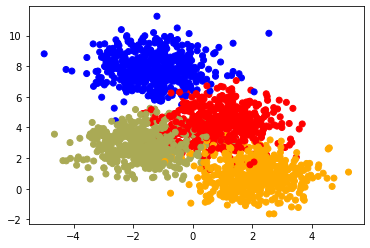

In [5]:
plt.scatter(data[:,0],data[:,1], c=labels, cmap=mcmap)
plt.show()

In [6]:
x_train, x_test, y_train, y_test= TTS(data, labels, stratify=labels, random_state=0)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(1500, 2) (1500,) (500, 2) (500,)


In [7]:
x_train, x_test, y_train, y_test= map(torch.tensor, (x_train, x_test, y_train, y_test))
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

torch.Size([1500, 2]) torch.Size([1500]) torch.Size([500, 2]) torch.Size([500])


In [8]:
def model(x):
  a1=torch.matmul(x, weights1) + bias1
  h1=a1.sigmoid()
  a2=torch.matmul(h1, weights2) + bias2
  h2=a2.exp()/a2.exp().sum(-1).unsqueeze(-1)
  return h2

In [9]:
def loss_calc(y_hat, y):
  return -(y_hat[range(y.shape[0]), y].log()).mean()

In [10]:
def accuracy(y_hat, y):
  pred=torch.argmax(y_hat, dim=1)
  return (pred == y).float().mean()

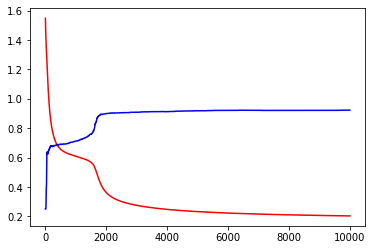

Loss before Training 1.5479837656021118


In [11]:
torch.manual_seed(0)

weights1=torch.randn(2, 2)/math.sqrt(2)
weights1.requires_grad_()
bias1=torch.zeros(2, requires_grad=True)

weights2=torch.randn(2, 4)/math.sqrt(2)
weights2.requires_grad_()
bias2=torch.zeros(4, requires_grad=True)

lr=0.2
epochs=10000

x_train=x_train.float()
y_train=y_train.long()

loss_arr=[]
acc_arr=[]

for epoch in range(epochs):
  y_hat=model(x_train)
  loss=loss_calc(y_hat, y_train)
  loss.backward()
  loss_arr.append(loss.item())
  acc_arr.append(accuracy(y_hat, y_train))

  with torch.no_grad():
    weights1-= weights1.grad * lr
    bias1-= bias1.grad * lr
    weights2-= weights2.grad * lr
    bias2-= bias2.grad * lr

    weights1.grad.zero_()
    weights2.grad.zero_()
    bias1.grad.zero_()
    bias2.grad.zero_()

plt.plot(loss_arr, 'r-')
plt.plot(acc_arr,'b-')
plt.show()
print('Loss before Training', loss_arr[0])

In [12]:
loss_arr[-1]

0.2028089463710785

In [13]:
acc_arr[-1]

tensor(0.9227)

In [14]:
import torch.nn.functional as F

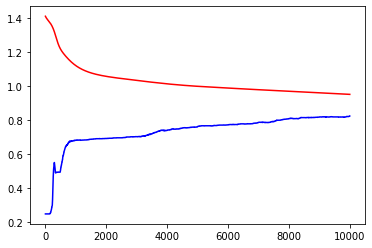

Loss before Training 1.4116289615631104


In [15]:
torch.manual_seed(0)

weights1=torch.randn(2, 2)/math.sqrt(2)
weights1.requires_grad_()
bias1=torch.zeros(2, requires_grad=True)

weights2=torch.randn(2, 4)/math.sqrt(2)
weights2.requires_grad_()
bias2=torch.zeros(4, requires_grad=True)

lr=0.2
epochs=10000

x_train=x_train.float()
y_train=y_train.long()

loss_arr=[]
acc_arr=[]

for epoch in range(epochs):
  y_hat=model(x_train)
  loss=F.cross_entropy(y_hat, y_train)
  loss.backward()
  loss_arr.append(loss.item())
  acc_arr.append(accuracy(y_hat, y_train))

  with torch.no_grad():
    weights1-= weights1.g value to be passed into fitrad * lr
    bias1-= bias1.grad * lr
    weights2-= weights2.grad * lr
    bias2-= bias2.grad * lr

    weights1.grad.zero_()
    weights2.grad.zero_()
    bias1.grad.zero_()
    bias2.grad.zero_()

plt.plot(loss_arr, 'r-')
plt.plot(acc_arr,'b-')
plt.show() value to be passed into fit
print('Loss before Training', loss_arr[0])

In [16]:
acc_arr[-1]

tensor(0.8253)

In [17]:
import torch.nn as nn

In [18]:
class FirstFN(nn.Module):
  
  def __init__(self):
    super().__init__()
    torch.manual_seed(0)
    self.weights1=nn.Parameter(torch.randn(2,2)/math.sqrt(2))
    self.weights2=nn.Parameter(torch.randn(2,4)/math.sqrt(2))
    self.bias1=nn.Parameter(torch.zeros(2))
    self.bias2=nn.Paramet value to be passed into fiter(torch.zeros(4))

  def forward(self, x):
    a1=torch.matmul(x, self.weights1) + self.bias1
    h1=a1.sigmoid()  
    a2=torch.matmul(h1, self.weights2) + self.bias2
    h2=a2.exp()/a2.exp().sum(-1).unsqueeze(-1)
    return h2



In [19]:

def fit(epochs=1000, lr=1):
  loss_arr=[]
  acc_arr=[]
  for epoch in TNN(range(epochs), total=epochs, unit="Epoch"):
    y_hat=fn(x_train)
    loss=F.cross_entropy(y_hat, y_train)
    loss_arr.append(loss.item())
    acc_arr.append(accuracy(y_hat, y_train))

    loss.backward()

    with torch.no_grad():
      for param in fn.parameters():
        param-=lr*param.grad
      fn.zero_grad()

  plt.plot(loss_arr,'r-')
  plt.plot(acc_arr,'b-')
  plt.show()
  print(loss_arr[-1], acc_arr[-1])

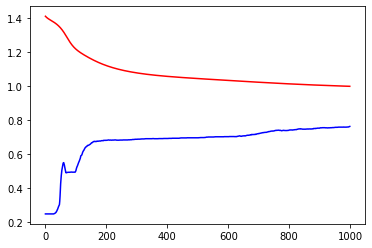

0.9999193549156189 tensor(0.7640)


In [20]:
fn=FirstFN()
fit()

In [21]:
class FF_v2(nn.Module):
  def __init__(self):
    super().__init__()
    torch.manual_seed(0)
    self.lin1=nn.Linear(2,2)
    self.lin2=nn.Linear(2,4)
 value to be passed into fit
  def forward(self, x):
    a1=self.lin1(x)
    h1=a1.sigmoid()
    a2=self.lin2(h1)
    h2=a2.exp()/a2.exp().sum(-1).unsqueeze(-1)
    return h2

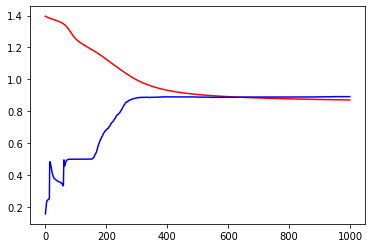

0.8712316751480103 tensor(0.8920)


In [22]:
fn=FF_v2()
fit()

In [23]:
from torch import optim


In [24]:
def fit_v1(epochs=1000, lr=1):
  loss_arr=[]
  acc_arr=[]
  opt=optim.SGD(fn.parameters(), lr=lr)

  for epoch in TNN(range(epochs), total=epochs, unit="Epoch"):
    y_hat=fn(x_train)
    loss=F.cross_entropy(y_hat, y_train)
    loss_arr.append(loss. value to be passed into fititem())
    acc_arr.append(accuracy(y_hat, y_train))

    loss.backward()
    opt.step()
    opt.zero_grad()

  plt.plot(loss_arr,'r-')
  plt.plot(acc_arr,'b-')
  plt.show()
  print(loss_arr[-1], acc_arr[-1])

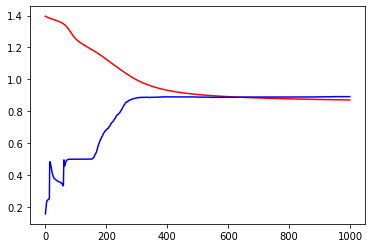

0.8712316751480103 tensor(0.8920)


In [25]:
fn=FF_v2()
fit_v1()

In [26]:
class FFN_v3(nn.Module):
  def __init__(self):
    super().__init__()
    torch.manual_seed(0)
    self.net=nn.Sequential(
        nn.Linear(2,2),
        nn.Sigmoid(),
        nn.Linear(2,4),
        nn.Softmax()
    )
  def forward(self, x):
    return self.net(x)
  

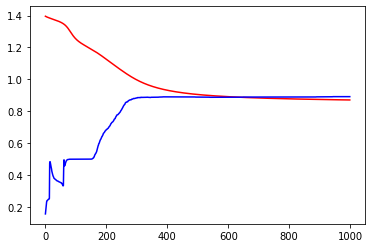

0.8712316751480103 tensor(0.8920)


In [27]:
fn=FFN_v3()
fit_v1()

In [28]:
def fit_v2(x, y, opt, mod, loss_fn, epochs=1000):
  for epoch in TNN(range(epochs), total=epochs, unit='Epoch'):
    loss=loss_fn(mod(x), y)
    loss.backward()
    opt.step()
    opt.zero_grad()
  return loss.item()

In [29]:
fn = FFN_v3()
loss_fn=F.cross_entropy
opt=optim.SGD(fn.parameters(), lr=0.9)
fit_v2(x_train, y_train, opt, fn, loss_fn)

0.8743124008178711

In [39]:
cuda0=torch.device('cuda:0')

In [40]:
x_train=x_train.to(cuda0)
y_train=y_train.to(cuda0)
fn=FFN_v3()
fn.to(cuda0)
tic=time.time()
print('Final Loss', fit_v2(x_train, y_train, opt, fn, loss_fn))
toc=time.time()
print('Time Taken', toc-tic)


Final Loss 1.395685076713562
Time Taken 1.4786579608917236
